# Loan Application 60 Month Analysis
Begin with importing the data and splitting into 36 month (3 years) and 60 month (5 years), and applying different machine learning algorthims to test the hard data without text

In [25]:
# Handle imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LCdata_C = pd.read_csv('data/LCdata2007_2018_C.csv', low_memory=False)

## Lending Club (LC) Data 2007 - 2018 C
## Columns
### id [removed] - Unique LC id
del LCdata_C['id']

### loan_amnt [numeric: int] - The listed amount applied for by the borrower

### funded_amnt [numeric: int] - The total amount committed to the loan at that point in time
del LCdata_C['funded_amnt']

### term [categorical: binary] - The number of payments on the loan in months, either 36 or 60
LCdata_C['term'] = pd.Categorical(LCdata_C['term'], categories=['36 months', '60 months'], ordered=True)

### int_rate [numeric: float] - Interest rate on the loan

### installment [numeric: float] - The monthly payment owed by the borrower if the loan originates

### grade [categorical: string] - LC assigned loan grade
LCdata_C['grade'] = pd.Categorical(LCdata_C['grade'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
del LCdata_C['grade']

### sub_grade [categorical: string] - LC assigned loan subgrade
LCdata_C['sub_grade'] = pd.Categorical(LCdata_C['sub_grade'], categories=['A1', 'A2', 'A3', 'A4', 'A5', 
                                                                          'B1', 'B2', 'B3', 'B4', 'B5', 
                                                                          'C1', 'C2', 'C3', 'C4', 'C5', 
                                                                          'D1', 'D2', 'D3', 'D4', 'D5', 
                                                                          'E1', 'E2', 'E3', 'E4', 'E5', 
                                                                          'F1', 'F2', 'F3', 'F4', 'F5', 
                                                                          'G1', 'G2', 'G3', 'G4', 'G5'], ordered=True)

### emp_title [variable: string] - The job title supplied by the Borrow when applying for the loan
# Removed for the hard data analysis
del LCdata_C['emp_title']

### emp_length [categorical: string] - Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years
LCdata_C['emp_length'] = pd.Categorical(LCdata_C['emp_length'], categories=['< 1 year', '1 year', '2 years', '3 years', 
                                                                            '4 years', '5 years', '6 years', '7 years', 
                                                                            '8 years', '9 years', '10+ years'], ordered=True)

### home_ownership [categorical: string] - The home ownership status provided by the borrower during registration: RENT, OWN, MORTGAGE, OTHER
LCdata_C['home_ownership'] = pd.Categorical(LCdata_C['home_ownership'], categories=['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT'], ordered=False)
LCdata_C['home_ownership'].cat.rename_categories({'MORTGAGE':'Mortgage', 'NONE':'None', 'OTHER':'Other', 'OWN':'Own', 'RENT':'Rent'}, inplace = True)

### annual_inc [numeric: float] - The self-reported annual income 

### verification_status [categorical: string] - Indicated if the income was verified by LC, not verified, or if the income source was verified
# Removed for hard analysis
LCdata_C['verification_status'] = pd.Categorical(LCdata_C['verification_status'], categories=['Not Verified', 'Source Verified', 'Verified'], ordered=False)
del LCdata_C['verification_status']

### earliest_cr_line [variable: datetime] - The month the borrower's earliest reported credit line was opened
# Removed - Time sensitive
LCdata_C['earliest_cr_line'] = pd.to_datetime(LCdata_C['earliest_cr_line'])
del LCdata_C['earliest_cr_line']

### issue_d [variable: datetime] - The month which the loan was funded
# Removed - Time sensitive
LCdata_C['issue_d'] = pd.to_datetime(LCdata_C['issue_d'])
del LCdata_C['issue_d']

### loan_status [categorical: binary]- Current status of the loan: Fully Paid, Charged Off, Current, In Grace Period, Late (16-30 days), Late (31-120 days). 
# Removed "Does not meet the credit policy" and dropped rows that were not Completed (Charged Off or Fully Paid)
LCdata_C['loan_status'] = LCdata_C['loan_status'].replace('Does not meet the credit policy. Status:Fully Paid', 'Fully Paid')
LCdata_C['loan_status'] = LCdata_C['loan_status'].replace('Does not meet the credit policy. Status:Charged Off', 'Charged Off')
LCdata_C['loan_status'] = LCdata_C['loan_status'].replace('Charged Off', 'Defaulted')
LCdata_C.drop(LCdata_C[LCdata_C['loan_status'] == 'Current'].index, inplace=True)
LCdata_C.drop(LCdata_C[LCdata_C['loan_status'] == 'In Grace Period'].index, inplace=True)
LCdata_C.drop(LCdata_C[LCdata_C['loan_status'] == 'Late (16-30 days)'].index, inplace=True)
LCdata_C.drop(LCdata_C[LCdata_C['loan_status'] == 'Late (31-120 days)'].index, inplace=True)
LCdata_C['loan_status'] = pd.Categorical(LCdata_C['loan_status'], categories=['Defaulted', 'Fully Paid'], ordered=False)


### desc [variable: string]- Description provided by the borrower
# Removed for the hard analysis

# purpose [categorical: string] - A category provided by the borrower for the loan request
LCdata_C['purpose'] = pd.Categorical(LCdata_C['purpose'], categories=['car', 'credit_card', 'debt_consolidation', 'educational',
                                                                      'home_improvement', 'house', 'major_purchase', 'medical', 'moving',
                                                                      'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'], ordered=False)
LCdata_C['purpose'].cat.rename_categories({'car':'Car', 'credit_card':'Credit Card', 'debt_consolidation':'Debt Consolidation', 'educational':'Educational',
                                           'home_improvement':'Home Improvement', 'house':'House', 'major_purchase':'Major Purchase', 'medical':'Medical', 'moving':'Moving',
                                           'other':'Other', 'renewable_energy':'Renewable Energy', 'small_business':'Small Business', 'vacation':'Vacation', 'wedding':'Wedding'}, inplace = True)

### title [variable: string] - The loan title provided by the borrower
# Removed for the hard analysis
del LCdata_C['title']

### zip_code [categorical: string]-  The first 3 letters of the zip code
# Removed for the hard analysis
LCdata_C['zip_code'] = LCdata_C['zip_code'].astype('category')
del LCdata_C['zip_code']

### addr_state [categorical: string] - State
LCdata_C['addr_state'] = pd.Categorical(LCdata_C['addr_state'], categories=['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
                                                                            'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
                                                                            'MO', 'MS', 'MT', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK',
                                                                            'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI',
                                                                            'WV', 'WY'], ordered=False)
del LCdata_C['addr_state']
### dti [numeric: float] - A ratio calculated using the borrower's total monthly debt payments on 
# the total debt obligations, excluding mortgage and the requested LC loan, divided by the monthly income

### delinq_2yrs [numeric: float] - The number of 30+ days past-due amount owed for the 
# account on which the borrower is now delinquent
# Removed - time sensitive
del LCdata_C['delinq_2yrs']

### fico_score [numeric: int] - average of range of borrower's FICO score
LCdata_C['fico_score'] = (LCdata_C['fico_range_high'] - LCdata_C['fico_range_low']) // 2 + LCdata_C['fico_range_low']

### fico_range_low [numeric: int] - The lower boundary range of borrower's FICO score
# Deleted in favor of average FICO score
del LCdata_C['fico_range_low']

### fico_range_high [numeric: int] - The upper boundary range of borrower's FICO score
# Deleted in favor of average FICO score
del LCdata_C['fico_range_high']

### inq_last_6mths [numeric: float] - Number of inquiries in past 6 months (excluding auto and mortgage inquiries)
# Deleted - time sensitive
del LCdata_C['inq_last_6mths']

### mths_since_last_delinq [numeric: float] - Number of months since the borrower's last delinquency
# Deleted - time sensitive
del LCdata_C['mths_since_last_delinq']

### upb [numeric: float] - Unpaid principle balance
# Remove rounding errors - all paid off loans should have an Unpaid Balance of 0
# Removed for hard analysis - data leak
LCdata_C.loc[LCdata_C['loan_status'] == 'Fully Paid', 'upb'] = 0.0
del LCdata_C['upb']

### default [categorical: binary] - Whether the account has defaulted
# Duplicate - Marked in loan_status
del LCdata_C['default']

### dq31plus [categorical: binary] - Whether the account is 31+ days deliquient
# Removed - time-sensitive
del LCdata_C['dq31plus']

### default_time [numeric: float] - Time to default
# Removed for hard analysis - data leak
del LCdata_C['default_time']

### lgd1 - Loss Given Default
# Removed for hard analysis - data leak
del LCdata_C['lgd1']

### lgd2 - Loss Given Default
# Removed for hard analysis - data leak
del LCdata_C['lgd2']

# Split into two datasets
LCdata_60 = LCdata_C[LCdata_C['term'] == '60 months'].copy(deep=True)
del LCdata_60['term']

sns.set()
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set_palette("deep")

# Exploratory Data Anaylsis - 60 Month Loans

## Univariate Visualization

### Loan Amount

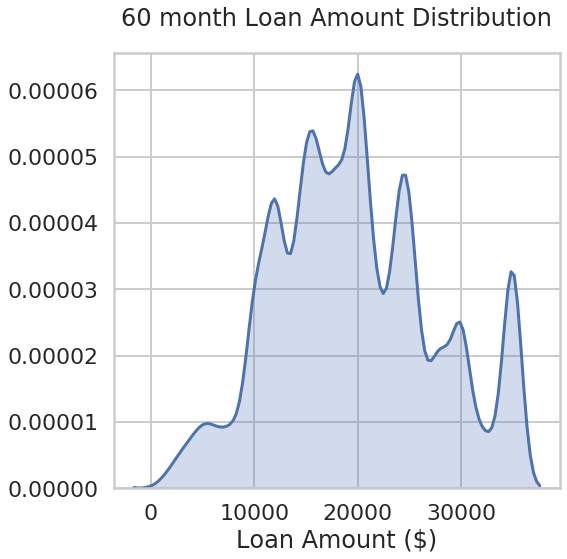

In [2]:
data = LCdata_60
label = 'Loan Amount'
name = 'loan_amnt'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Interest Rate

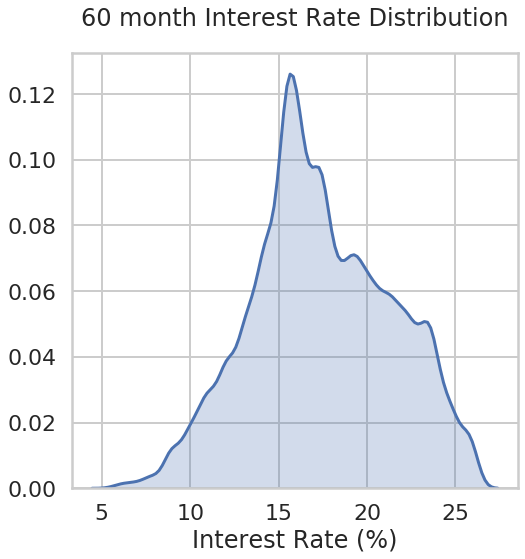

In [3]:
data = LCdata_60
label = 'Interest Rate'
name = 'int_rate'
units = '%'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Installment

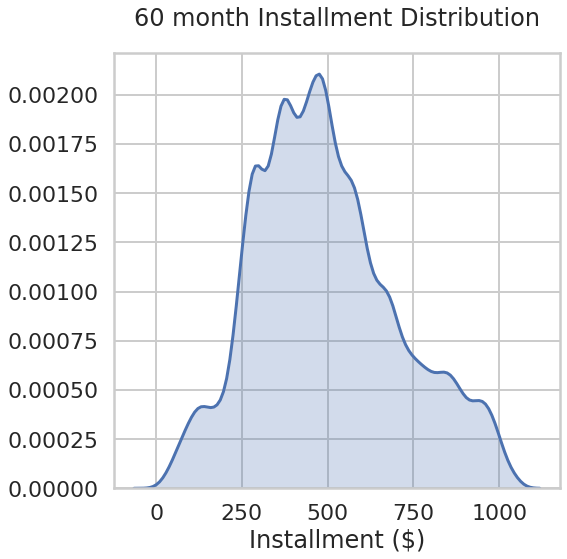

In [4]:
data = LCdata_60
label = 'Installment'
name = 'installment'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Sub-Grade

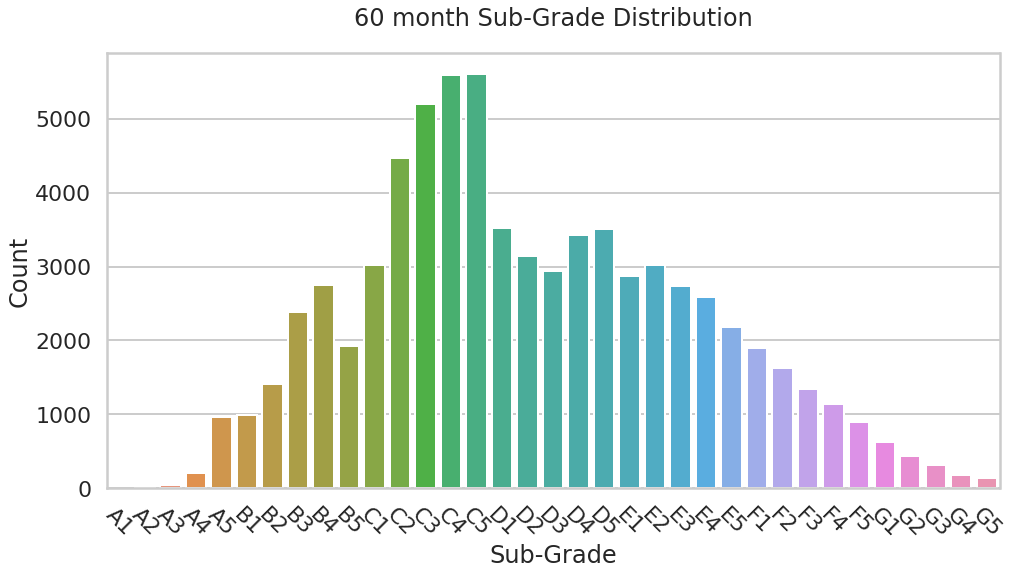

In [5]:
data = LCdata_60
name = 'sub_grade'
label = 'Sub-Grade'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name)
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -45)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Employment Length

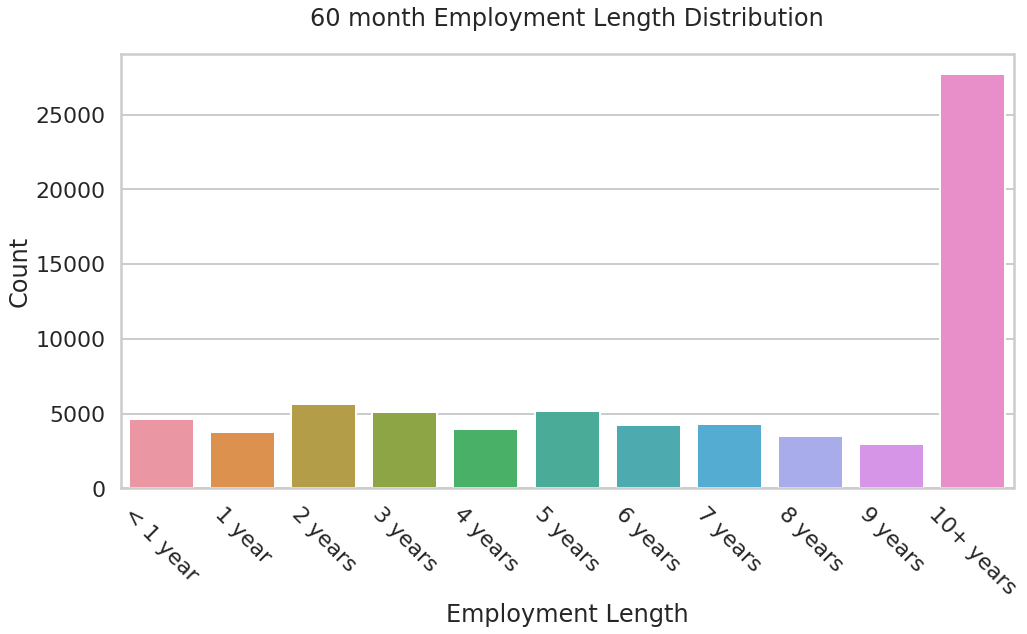

In [6]:
data = LCdata_60
name = 'emp_length'
label = 'Employment Length'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name)
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -45)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Home Ownership

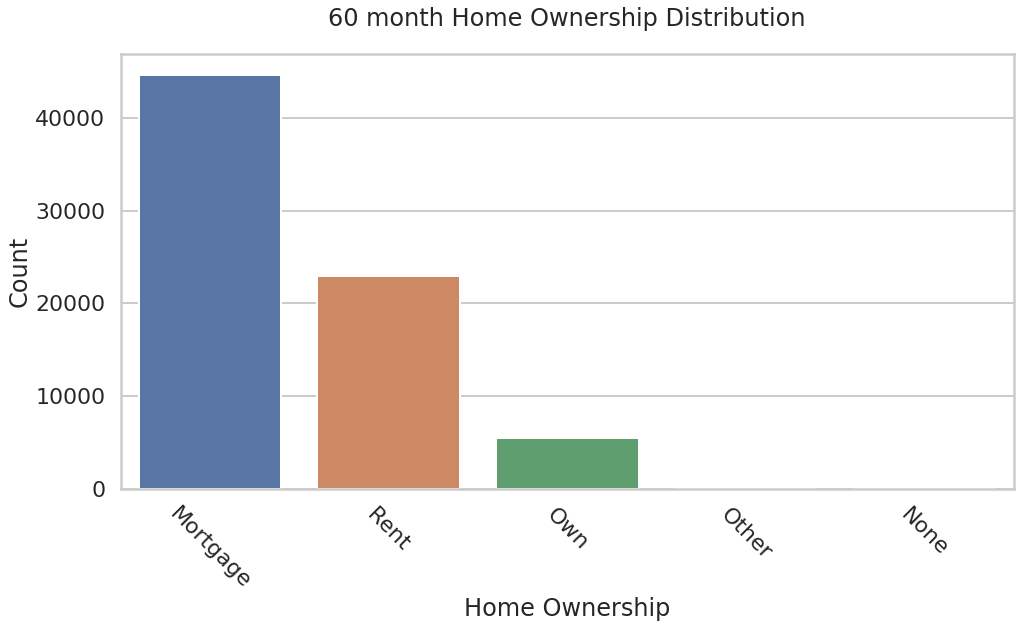

In [7]:
data = LCdata_60
name = 'home_ownership'
label = 'Home Ownership'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, order=['Mortgage', 'Rent', 'Own', 'Other', 'None'])
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -45)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Annual Income
Removed ~500 entries above $250,000 to create a more representative graph

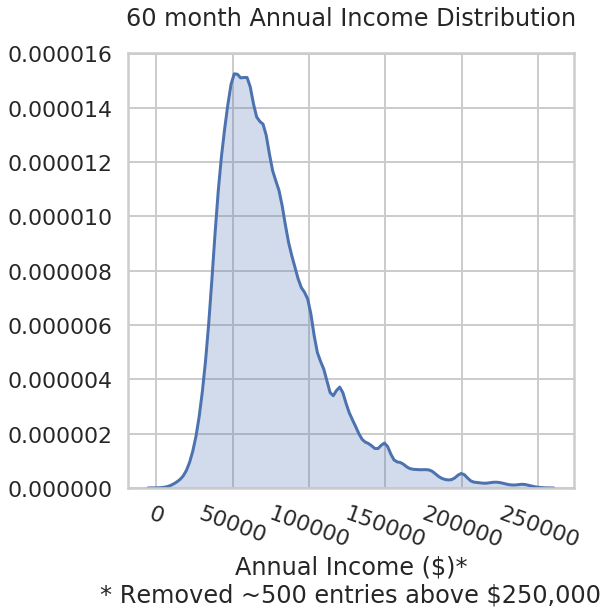

In [8]:
data = LCdata_60
data = data[data['annual_inc'] < 250000]
label = 'Annual Income'
name = 'annual_inc'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label + ' (' + units + ''')*
* Removed ~500 entries above $250,000''', ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -20)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Loan Status

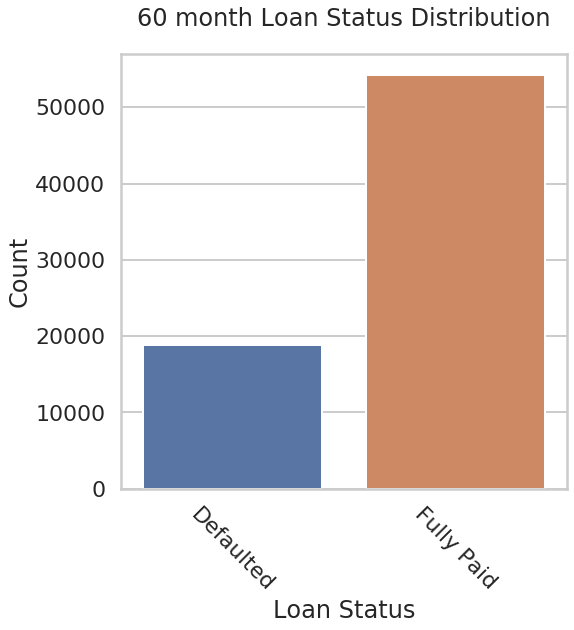

In [9]:
data = LCdata_60
name = 'loan_status'
label = 'Loan Status'
plt.figure(figsize = (8, 8))
ax = sns.countplot(data = data, x = name)
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -45)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Loan Purpose

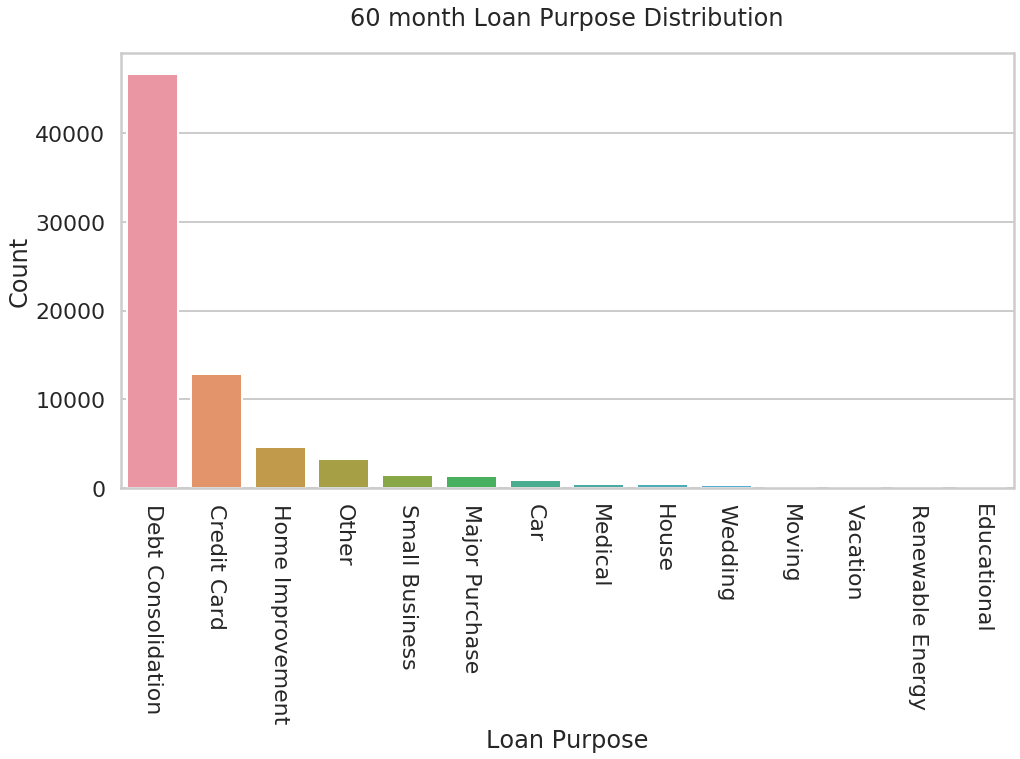

In [10]:
data = LCdata_60
name = 'purpose'
label = 'Loan Purpose'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, order = ['Debt Consolidation', 'Credit Card', 'Home Improvement', 
                                                   'Other', 'Small Business', 'Major Purchase', 'Car',  
                                                   'Medical', 'House','Wedding', 'Moving', 'Vacation', 
                                                   'Renewable Energy', 'Educational'])
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.xticks(rotation = -90)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### Debt to Income Ratio

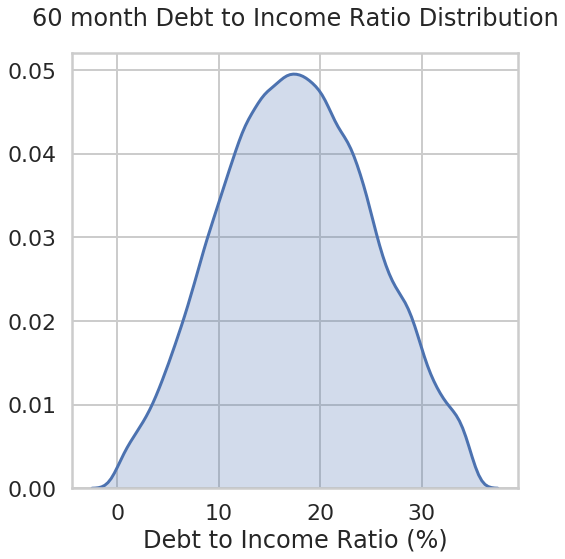

In [11]:
data = LCdata_60
label = 'Debt to Income Ratio'
name = 'dti'
units = '%'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

### FICO Score

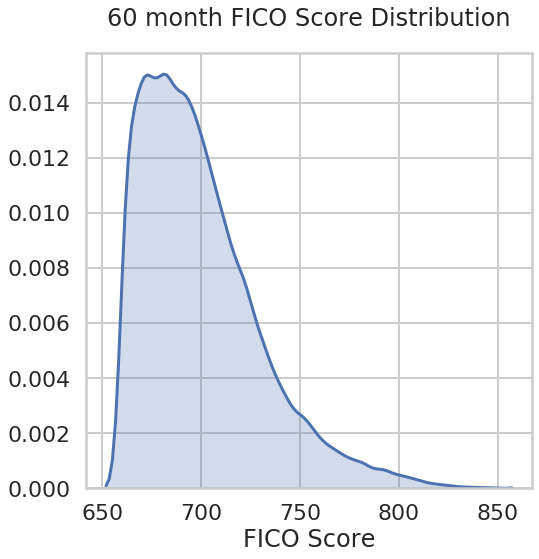

In [12]:
data = LCdata_60
label = 'FICO Score'
name = 'fico_score'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data[name], shade = True, legend = None)
ax.set(xlabel = label, ylabel = '')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
plt.savefig('plots/uni_' + name + '_60.png', dpi = 300, bbox_inches="tight")

## Bivariate Visualization
Variable of Interest: Loan Status

### Loan Amount

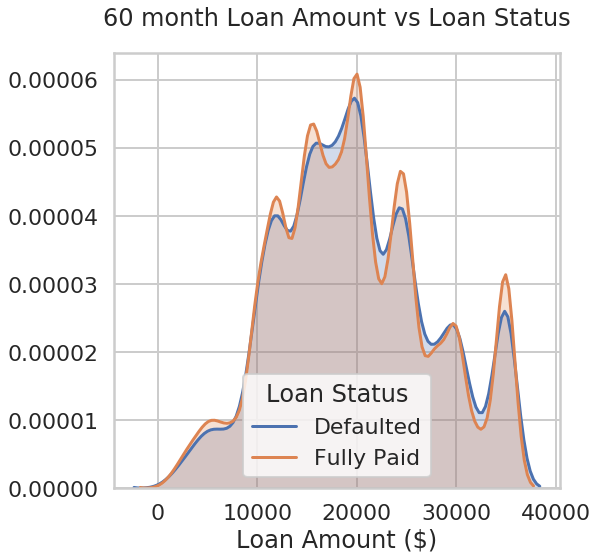

In [13]:
data = LCdata_60
label = 'Loan Amount'
name = 'loan_amnt'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Interest Rate

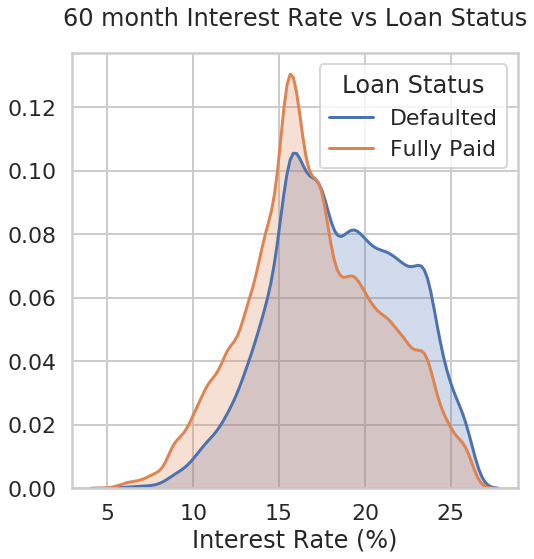

In [14]:
data = LCdata_60
label = 'Interest Rate'
name = 'int_rate'
units = '%'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Installment

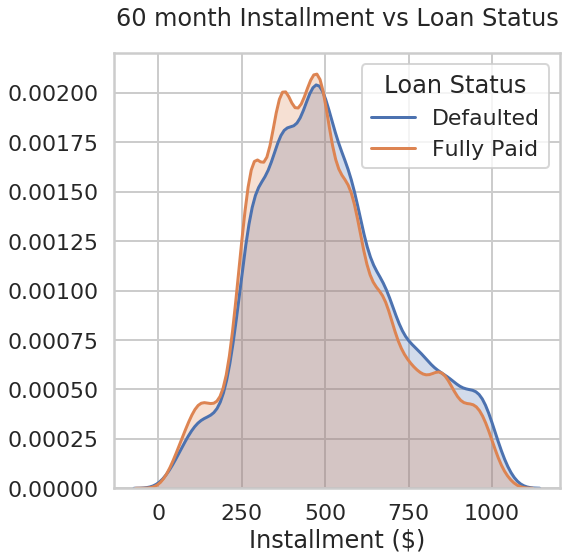

In [15]:
data = LCdata_60
label = 'Installment'
name = 'installment'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Sub-Grade

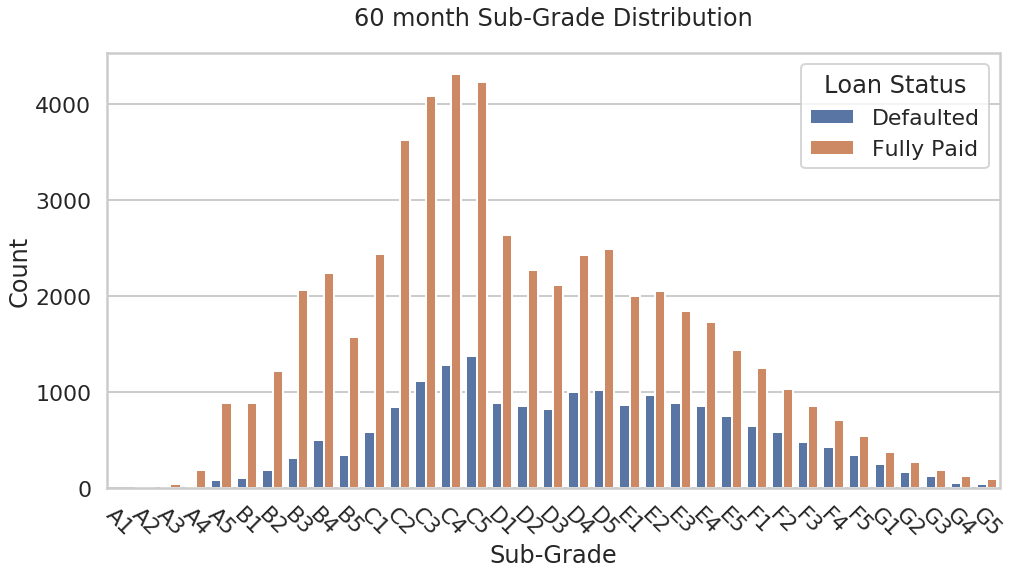

In [16]:
data = LCdata_60
name = 'sub_grade'
label = 'Sub-Grade'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, hue = 'loan_status')
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
ax.legend().set_title('Loan Status')
plt.xticks(rotation = -45)
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Employment Length

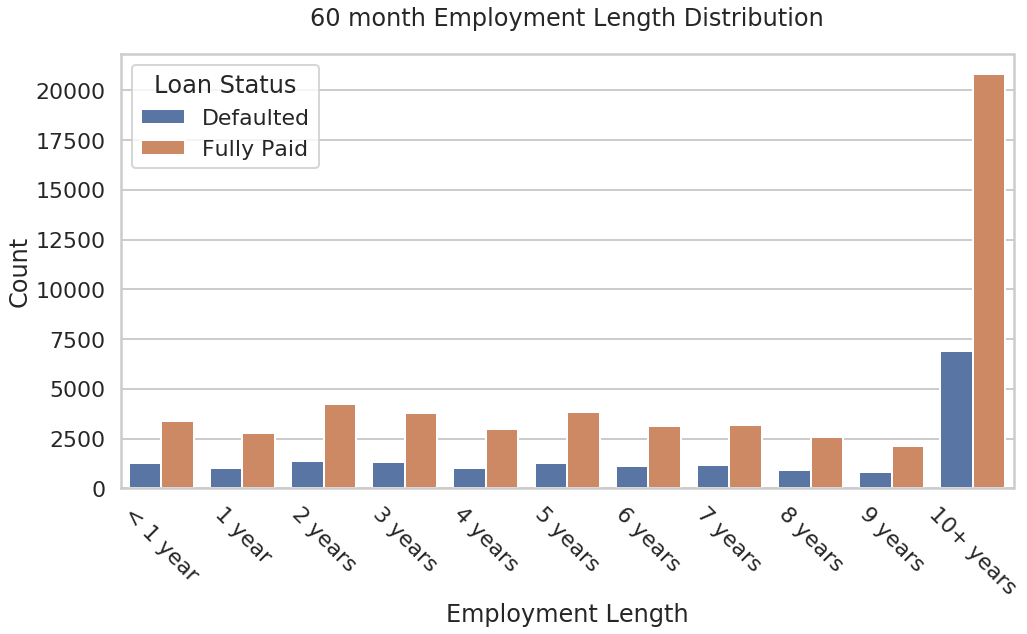

In [17]:
data = LCdata_60
name = 'emp_length'
label = 'Employment Length'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, hue = 'loan_status')
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
ax.legend().set_title('Loan Status')
plt.xticks(rotation = -45)
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Home Ownership

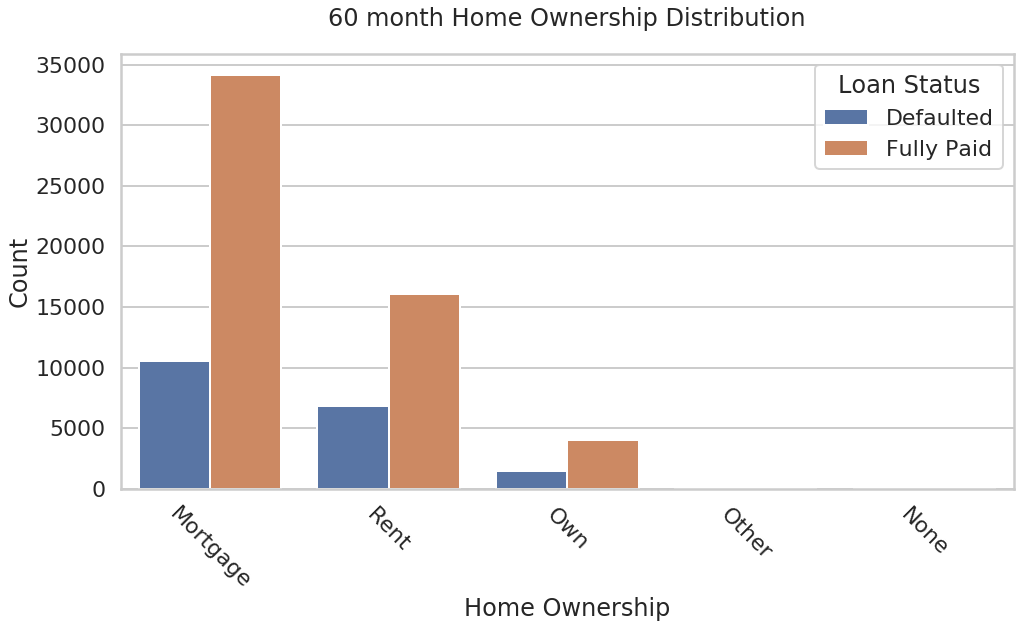

In [18]:
data = LCdata_60
name = 'home_ownership'
label = 'Home Ownership'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, hue = 'loan_status', order = ['Mortgage', 'Rent', 'Own', 'Other', 'None'])
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
ax.legend().set_title('Loan Status')
plt.xticks(rotation = -45)
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Annual Income
Removed ~500 entries above $250,000 to create a more representative graph

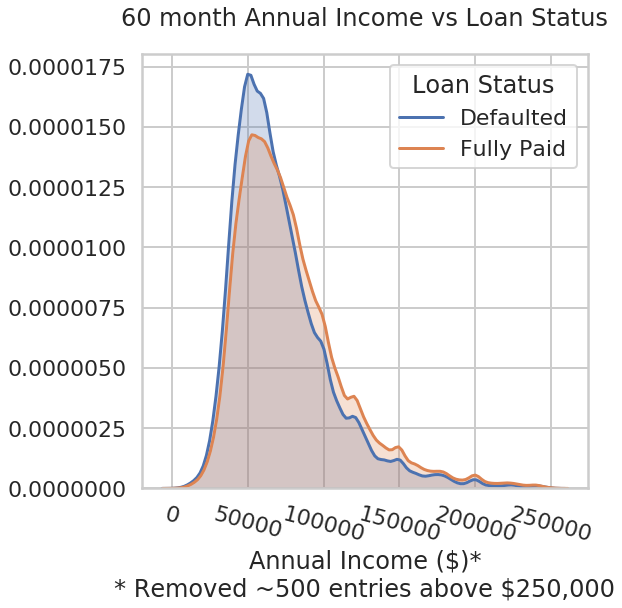

In [19]:
data = LCdata_60
data = data[data['annual_inc'] < 250000]
name = 'annual_inc'
label = 'Annual Income'
units = '$'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label + ' (' + units + ''')*
* Removed ~500 entries above $250,000''', ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.xticks(rotation = -15)
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Loan Purpose

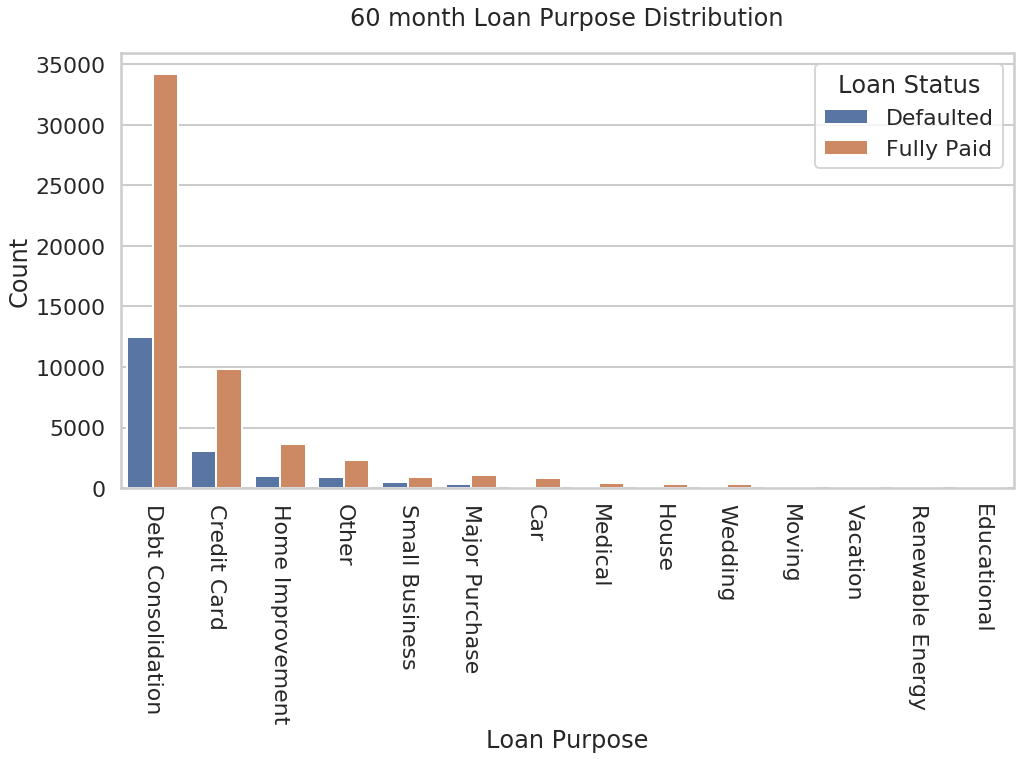

In [20]:
data = LCdata_60
name = 'purpose'
label = 'Loan Purpose'
plt.figure(figsize = (16, 8))
ax = sns.countplot(data = data, x = name, hue = 'loan_status', order = ['Debt Consolidation', 'Credit Card', 'Home Improvement', 
                                                   'Other', 'Small Business', 'Major Purchase', 'Car',  
                                                   'Medical', 'House','Wedding', 'Moving', 'Vacation', 
                                                   'Renewable Energy', 'Educational'])
ax.set(xlabel = label, ylabel = 'Count')
plt.title('60 month ' + label + ' Distribution', y = 1.05)
ax.legend().set_title('Loan Status')
plt.xticks(rotation = -90)
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### Debt to Income Ratio

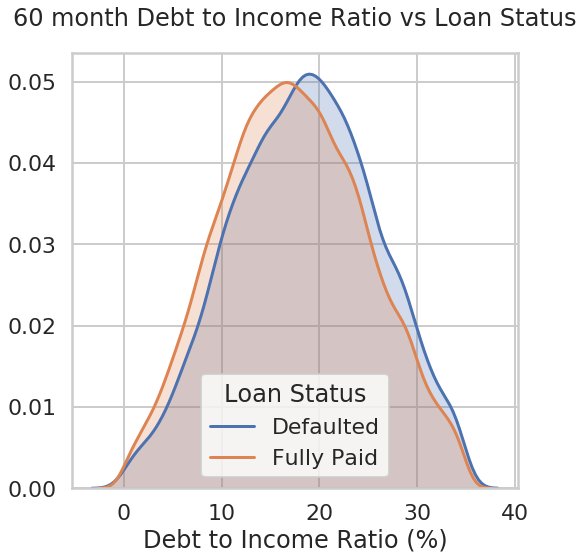

In [21]:
data = LCdata_60
name = 'dti'
label = 'Debt to Income Ratio'
units = '%'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label + ' (' + units + ')', ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

### FICO Score

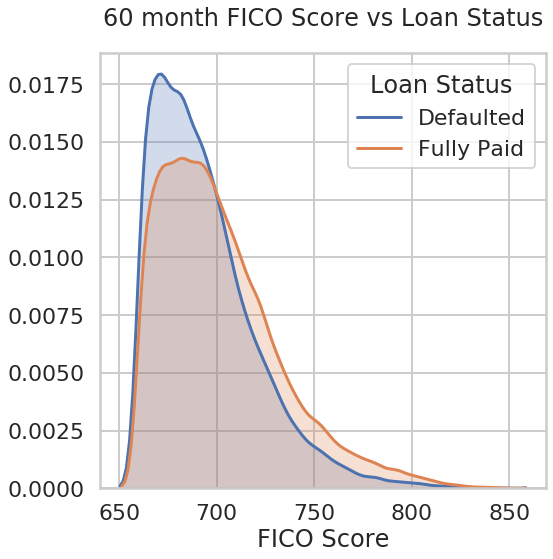

In [22]:
data = LCdata_60
label = 'FICO Score'
name = 'fico_score'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['loan_status'] == 'Defaulted'][name], shade = True, label = 'Defaulted')
sns.kdeplot(data[data['loan_status'] == 'Fully Paid'][name], shade = True, label = 'Fully Paid')
ax.set(xlabel = label, ylabel = '')
plt.title('60 month ' + label + ' vs Loan Status', y = 1.05)
ax.legend().set_title('Loan Status')
plt.savefig('plots/bi_' + name + '_vs_loan_status_60.png', dpi = 300, bbox_inches="tight")

# Logistic Regression
Logistic Regression is a classification algorithm that is used to predict the probability of a categorical variable, coded as a binary integer.

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
import time

def trial(test_size, random_state, gridsearch = True, C = None, penalty = None, solver = None, tol = None):
    time_start = time.perf_counter()
    
    numeric_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_score']
    ordinal_features = ['emp_length', 'sub_grade']
    nominal_features = ['home_ownership', 'purpose']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, 
                                                   random_state = random_state)
    
    X_train_1 = X_train.reset_index(drop = True)
    y_train_1 = y_train.reset_index()['loan_status']
    X_test_1 = X_test.reset_index(drop = True)
    y_test_1 = y_test.reset_index()['loan_status']


    # Pipeline
    numeric_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())])

    ordinal_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OrdinalEncoder(categories = [['missing', '< 1 year', '1 year', '2 years', '3 years', '4 years',
                                        '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                                       ['missing', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 
                                        'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 
                                        'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 
                                        'G1', 'G2', 'G3', 'G4', 'G5']]))
    ])

    nominal_transformer = Pipeline(steps = [
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
    ])
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('nominal', nominal_transformer, nominal_features)
    ])
    
    clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty = penalty, solver = solver, max_iter = 10000, 
                              class_weight = 'balanced', random_state = random_state, n_jobs = -1))
    ])

    # Encode y column
    labelencoder = LabelEncoder()
    y_train_1 = labelencoder.fit_transform(y_train_1)
    y_test_1 = labelencoder.transform(y_test_1)

    
    # GridSearch
    y_pred_1 = None
    report = None
    auc = None
    time_diff = None
    if gridsearch == True:
        gsc = GridSearchCV(
        estimator = clf,
        param_grid = {
            'classifier__penalty':['l1', 'l2'],
            'classifier__tol':[0.0001, 0.001],
            'classifier__C':[0.001, 0.01, 0.1],
            'classifier__solver':['lgbfs', 'saga']
        },
        cv = 5,
        scoring = scoring,
        n_jobs = -1, 
        verbose = 10)

        grid_result = gsc.fit(X_train_1, y_train_1)
        
        y_pred_1 = grid_result.best_estimator_.predict(X_test_1)
        
        best_params = grid_result.best_params_
    
        report = classification_report(y_test_1, y_pred_1, target_names = ['Default', 'Fully Paid'], output_dict = True)

        auc = balanced_accuracy_score(y_test_1, y_pred_1)
        
        C = best_params['classifier__C']
        penalty = best_params['classifier__penalty']
        solver = best_params['classifier__solver']
        tol = best_params['classifier__tol']
        
        time_diff = time.perf_counter() - time_start
        
    else:
        clf.fit(X_train_1, y_train_1)

        y_pred_1 = clf.predict(X_test_1)
    
        report = classification_report(y_test_1, y_pred_1, target_names = ['Default', 'Fully Paid'], output_dict = True)

        auc = balanced_accuracy_score(y_test_1, y_pred_1)
    
        time_diff = time.perf_counter() - time_start
    
    return (auc, report['Default']['precision'], report['Default']['recall'], report['Default']['f1-score'], report['Default']['support'],
            report['Fully Paid']['precision'], report['Fully Paid']['recall'], report['Fully Paid']['f1-score'], report['Fully Paid']['support'],
            C, penalty, solver, tol, time_diff)

bal_acc_list = []
d_prec = []
d_rec = []
d_f1 = []
d_sup = []
f_prec = []
f_rec = []
f_f1 = []
f_sup = []
C_list = []
penalty_list = []
solver_list = []
tol_list = []
time_list = []
random_state_list = []
scoring = 'balanced_accuracy'

X = LCdata_60.copy(deep = True)

del X['desc']
y = X['loan_status']
del X['loan_status']

# Run Trials
for i in range(100):
    results = trial(0.7, i, True)
    bal_acc_list.append(results[0])
    d_prec.append(results[1])
    d_rec.append(results[2])
    d_f1.append(results[3])
    d_sup.append(results[4])
    f_prec.append(results[5])
    f_rec.append(results[6])
    f_f1.append(results[7])
    f_sup.append(results[8])
    C_list.append(results[9])
    penalty_list.append(results[10])
    solver_list.append(results[11])
    tol_list.append(results[12])
    time_list.append(results[13])
    random_state_list.append(i)
    print('completed ' + str(i))
    

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.6s finished


completed 0
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1099s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0182s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.4s finished


completed 1
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1062s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0064s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    9.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.4s finished


completed 2
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1070s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1766s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.9s finished


completed 3
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1624s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1064s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.4s finished


completed 4
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1079s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3345s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.3s finished


completed 5
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1047s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1359s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   26.4s finished


completed 6
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1085s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1583s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.1s finished


completed 7
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1047s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0959s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.9s finished


completed 8
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1022s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1045s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.2s finished


completed 9
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1094s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2605s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.3s finished


completed 10
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1133s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0047s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 11
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1092s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0245s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.4s finished


completed 12
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1050s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0479s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 13
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1063s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1116s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.5s finished


completed 14
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1104s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0585s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.7s finished


completed 15
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1085s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3221s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   25.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.7s finished


completed 16
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1012s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0264s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.5s finished


completed 17
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1027s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5804s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.9s finished


completed 18
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1067s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0597s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.5s finished


completed 19
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1079s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0839s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.5s finished


completed 20
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1023s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2457s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   23.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.5s finished


completed 21
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1043s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0083s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.6s finished


completed 22
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1106s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1274s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    9.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.0s finished


completed 23
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0997s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0867s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.6s finished


completed 24
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1059s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0994s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 25
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1086s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1817s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.8s finished


completed 26
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1081s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5295s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   26.3s finished


completed 27
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1034s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0407s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.6s finished


completed 28
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1037s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1523s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.5s finished


completed 29
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1033s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4708s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   21.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.5s finished


completed 30
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1059s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0809s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 31
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0971s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0813s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.1s finished


completed 32
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1009s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1324s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.1s finished


completed 33
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1080s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0939s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 34
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1025s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.6027s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.3s finished


completed 35
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1032s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2014s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   25.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.4s finished


completed 36
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1124s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2146s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.8s finished


completed 37
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1018s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1662s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.7s finished


completed 38
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1006s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1847s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.2s finished


completed 39
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1086s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3731s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   20.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.4s finished


completed 40
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1089s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0617s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 41
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1057s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0439s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 42
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1027s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0449s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 43
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1082s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1100s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.9s finished


completed 44
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1001s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1801s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.2s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.5s finished


completed 45
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1053s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0062s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 46
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1009s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0938s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.8s finished


completed 47
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1084s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1945s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.4s finished


completed 48
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1078s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0464s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    9.2s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.4s finished


completed 49
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1070s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0757s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.5s finished


completed 50
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1029s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1093s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.2s finished


completed 51
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1012s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4034s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.3s finished


completed 52
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1143s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1223s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:   13.2s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   20.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.1s finished


completed 53
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1058s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0139s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.0s finished


completed 54
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1115s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0595s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.0s finished


completed 55
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1086s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0446s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 56
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1066s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3513s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:   14.4s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   21.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.7s finished


completed 57
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1084s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4002s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   21.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.0s finished


completed 58
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1128s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2912s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 59
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1102s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1203s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.7s finished


completed 60
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1083s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1876s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   21.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.6s finished


completed 61
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1036s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0335s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.8s finished


completed 62
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1034s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1056s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.0s finished


completed 63
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1023s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0454s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.8s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.1s finished


completed 64
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1051s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4204s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.2s finished


completed 65
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0968s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0468s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.5s finished


completed 66
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1096s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2854s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.4s finished


completed 67
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1056s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0367s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.1s finished


completed 68
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0977s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0761s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.2s finished


completed 69
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1014s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4349s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:   15.4s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   23.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.8s finished


completed 70
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1034s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1078s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.6s finished


completed 71
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1078s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0053s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.3s finished


completed 72
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1039s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0035s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.9s finished


completed 73
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1094s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0514s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.0s finished


completed 74
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1025s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1026s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.4s finished


completed 75
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1065s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4465s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   20.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   20.9s finished


completed 76
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1067s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1628s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.0s finished


completed 77
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1032s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0029s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.9s finished


completed 78
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1050s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.3805s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   23.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.5s finished


completed 79
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1084s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0553s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   14.8s finished


completed 80
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1104s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4201s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   23.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   24.0s finished


completed 81
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1103s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4772s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   24.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.1s finished


completed 82
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1045s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0622s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.1s finished


completed 83
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1139s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0159s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.4s finished


completed 84
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1079s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4081s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   21.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   22.8s finished


completed 85
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1157s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4607s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   23.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   25.2s finished


completed 86
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1020s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0304s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  91 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.8s finished


completed 87
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1051s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0990s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    7.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.2s finished


completed 88
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1053s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1186s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    8.1s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.5s finished


completed 89
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1063s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0728s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 105 out of 120 | elapsed:    9.6s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.1s finished


completed 90
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1534s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2158s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   20.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   21.7s finished


completed 91
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1104s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4828s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  85 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   26.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.3s finished


completed 92
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1015s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1255s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   15.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.1s finished


completed 93
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1035s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.4831s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   22.9s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.8s finished


completed 94
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1065s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.5530s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  86 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   26.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   27.1s finished


completed 95
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1019s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0914s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   12.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.5s finished


completed 96
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1063s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0125s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   14.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   15.0s finished


completed 97
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1004s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0880s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   13.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   13.9s finished


completed 98
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1063s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0848s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 118 out of 120 | elapsed:   11.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.9s finished


completed 99


In [29]:
lr_results = pd.DataFrame({'Balanced Accuracy':bal_acc_list, 'Default Precision':d_prec, 'Default Recall':d_rec, 'Default F1-Score':d_f1, 'Default Support':d_sup,
              'Fully Paid Precision':f_prec, 'Fully Paid Recall':f_rec, 'Fully Paid F1-Score':f_f1, 'Fully Paid Support':f_sup, 'C':C_list, 'Penalty':penalty_list,
              'Solver':solver_list, 'Tolerance':tol_list, 'Time':time_list, 'Random State':random_state_list})

# Save results to file
lr_results.to_csv('results_60.csv')


## Test for Logistic Regression Assumptions

In [32]:
# Test for Log Odds and Independent Variable Linearity
# test = X_train[numeric_features]
# cols = test.columns
# probabilities = grid_result.best_estimator_.predict_proba(X_train)[:, 1]
# logit = pd.Series(np.minimum(np.log(probabilities/(1 - probabilities)), 7), name = 'logit')
# test = pd.concat([test, logit], axis = 'columns')

# col_names = ['Loan Amount', 'Interest Rate', 'Installment', 'Annual Income', 'Debt-to-Income Ratio', 'FICO Score']

# for i in range(len(cols)):
#     name = col_names[i]
#     col = cols[i]
#     plt.figure()
#     sns.scatterplot(data = test, x = 'logit', y = col, marker = '+')
#     plt.title('60 month ' + name + ' Linearity', y=1.1)
#     plt.xlabel("Logit")
#     plt.ylabel(name)
#     plt.savefig('plots/lin/linearity_' + col + '_60.png', dpi = 300, bbox_inches="tight")

# Textual Analysis

In [33]:
import nltk.corpus
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

stop = stopwords.words('english')

from pycontractions import Contractions
cont = Contractions(api_key='word2vec-google-news-300')
cont.load_models()

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/zachharoian/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zachharoian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /home/zachharoian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Preprocessing

In [34]:
# from tqdm.auto import tqdm
# tqdm.pandas()
# text = LCdata_60['desc'].copy(deep = True)
# text.fillna('', inplace = True)

# # Change to lowercase. Remove borrower addded on date prefix. Remove HTML line break
# text = text.str.lower().replace('(\w+ )?added on \d{2}\/\d{2}\/\d{2} >', '', regex = True).replace('<br\/?>', '\n', regex = True)

# # Remove </>/newline/tabs/URLs
# text = text.str.replace('<|>|\n|\t', '').replace("(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", '')   

# # Remove accents
# text = text.progress_apply(lambda entry: unidecode.unidecode(entry))

# # Replace contractions
# text = text.progress_apply(lambda entry: ' '.join([word for word in (cont.expand_texts(entry.lower().split()))]))

# # Keep only letters.
# text = text.str.replace('[^A-z ]+', '')

# # Remove Stopwords and Lemmatize
# wnl = WordNetLemmatizer()
# text = text.progress_apply(lambda entry: ' '.join([wnl.lemmatize(word) for word in entry.lower().split() if word not in (stop)]))

# # Remove multiple whitespace
# text = text.str.replace('\s\s+', ' ')
# text.to_csv('data/preproc_text_60.csv')

In [35]:
from pandas import Panel
from tqdm.auto import tqdm
import textstat

X = LCdata_60.copy(deep = True)

# Fill NAs
X['desc'].fillna('', inplace = True)

# Cleaned text
clean_text = pd.read_csv('data/preproc_text_60.csv', header = 0, names = ['clean_text'], index_col = 0, dtype = 'string').fillna('')
X = clean_text.reset_index(drop = True).join(X.reset_index(drop = True))

# Add reading grade from text stat
tqdm.pandas(desc='Calculate Reading Level')
X['reading_level'] = X['desc'].progress_apply(lambda entry: textstat.text_standard(entry, float_output = True) if entry != '' else 0)

y = X['loan_status']
del X['loan_status']

# Load corpuses
wnl = WordNetLemmatizer()

tqdm.pandas(desc='Lemmatize Positive Words')
words_pos = set(pd.read_csv('data/LM-pos.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Negative Words')
words_neg = set(pd.read_csv('data/LM-neg.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Uncertain Words')
words_uncert = set(pd.read_csv('data/LM-uncert.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Strong Modal Words')
words_strong_modal = set(pd.read_csv('data/LM-st-modal.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Weak Modal Words')
words_weak_modal = set(pd.read_csv('data/LM-wk-modal.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Contraint Words')
words_constrain = set(pd.read_csv('data/LM-constrain.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

tqdm.pandas(desc='Lemmatize Lit Words')
words_lit = set(pd.read_csv('data/LM-lit.csv', header = None, dtype="string", names=['words'])['words'].str.lower().progress_apply(lambda entry: wnl.lemmatize(entry)))

# Apply corpuses
tqdm.pandas(desc='Count Positive Words')
X['pos'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_pos])))

tqdm.pandas(desc='Count Negative Words')                         
X['neg'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_neg])))

tqdm.pandas(desc='Count Uncertain Words')                         
X['uncert'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_uncert])))

tqdm.pandas(desc='Count Strong Modal Words')                         
X['strong_modal'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_strong_modal])))

tqdm.pandas(desc='Count Weak Modal Words')                         
X['weak_modal'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_weak_modal])))

tqdm.pandas(desc='Count Contraint Words')                         
X['constrain'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_constrain])))

tqdm.pandas(desc='Count Lit Words')                         
X['lit'] = X['clean_text'].progress_apply(lambda entry: len(([word for word in entry.split() if word in words_lit])))

<ipython-input-35-c4b5b890e613>:1: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/zachharoian/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [36]:
bal_acc_list = []
d_prec = []
d_rec = []
d_f1 = []
d_sup = []
f_prec = []
f_rec = []
f_f1 = []
f_sup = []
C_list = []
penalty_list = []
solver_list = []
tol_list = []
time_list = []
random_state_list = []

lr_results = pd.read_csv('results_60.csv', index_col = 'Unnamed: 0')

for index, row in lr_results.iterrows():
    results = trial(0.7, row['Random State'], False, row['C'], row['Penalty'], row['Solver'], row['Tolerance'])
    bal_acc_list.append(results[0])
    d_prec.append(results[1])
    d_rec.append(results[2])
    d_f1.append(results[3])
    d_sup.append(results[4])
    f_prec.append(results[5])
    f_rec.append(results[6])
    f_f1.append(results[7])
    f_sup.append(results[8])
    C_list.append(results[9])
    penalty_list.append(results[10])
    solver_list.append(results[11])
    tol_list.append(results[12])
    time_list.append(results[13])
    random_state_list.append(row['Random State'])
    print('completed ' + str(index))

completed 0
completed 1
completed 2
completed 3
completed 4
completed 5
completed 6
completed 7
completed 8
completed 9
completed 10
completed 11
completed 12
completed 13
completed 14
completed 15
completed 16
completed 17
completed 18
completed 19
completed 20
completed 21
completed 22
completed 23
completed 24
completed 25
completed 26
completed 27
completed 28
completed 29
completed 30
completed 31
completed 32
completed 33
completed 34
completed 35
completed 36
completed 37
completed 38
completed 39
completed 40
completed 41
completed 42
completed 43
completed 44
completed 45
completed 46
completed 47
completed 48
completed 49
completed 50
completed 51
completed 52
completed 53
completed 54
completed 55
completed 56
completed 57
completed 58
completed 59
completed 60
completed 61
completed 62
completed 63
completed 64
completed 65
completed 66
completed 67
completed 68
completed 69
completed 70
completed 71
completed 72
completed 73
completed 74
completed 75
completed 76
completed

In [37]:
text_list = []
for i in range(100):
    text_list.append(1)
    
text_results = pd.DataFrame({'Balanced Accuracy':bal_acc_list, 'Default Precision':d_prec, 'Default Recall':d_rec, 'Default F1-Score':d_f1, 'Default Support':d_sup,
              'Fully Paid Precision':f_prec, 'Fully Paid Recall':f_rec, 'Fully Paid F1-Score':f_f1, 'Fully Paid Support':f_sup, 'C':C_list, 'Penalty':penalty_list,
              'Solver':solver_list, 'Tolerance':tol_list, 'Time':time_list, 'Random State':random_state_list, 'Text Analysis': text_list})

lr_list = []
for i in range(100):
    lr_list.append(0)

lr_list = pd.Series(lr_list, name = 'Text Analysis')
lr_results = lr_results.join(lr_list)

results = pd.concat([text_results, lr_results]).reset_index(drop = True)


In [59]:
import scipy
def t_test(col):
    return scipy.stats.ttest_rel(results[results['Text Analysis'] == 1][col], results[results['Text Analysis'] == 0][col])


print(t_test('Fully Paid F1-Score'))

Ttest_relResult(statistic=-4.18991218016657, pvalue=6.068665568751678e-05)


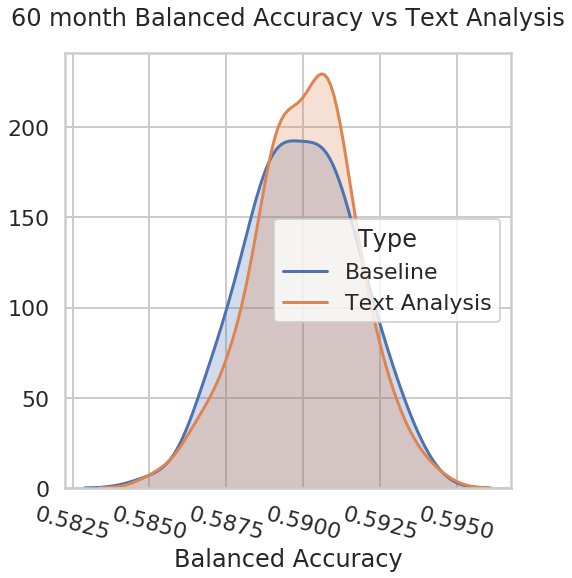

In [43]:
data = results
name = 'Balanced Accuracy'
label = 'Balanced Accuracy'
plt.figure(figsize = (8, 8))
ax = sns.kdeplot(data = data[data['Text Analysis'] == 0][name], shade = True, label = 'Baseline')
sns.kdeplot(data[data['Text Analysis'] == 1][name], shade = True, label = 'Text Analysis')
ax.set(xlabel = label , ylabel = '')
plt.xticks(rotation = -15)
plt.title('60 month ' + label + ' vs Text Analysis', y = 1.05)
ax.legend().set_title('Type')

In [47]:
results[results['Text Analysis'] == 0].describe()

,Balanced Accuracy,Default Precision,Default Recall,Default F1-Score,Default Support,Fully Paid Precision,Fully Paid Recall,Fully Paid F1-Score,Fully Paid Support,C,Tolerance,Time,Random State,Text Analysis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.589914,0.331518,0.600107,0.427079,13195.580000,0.806739,0.579722,0.674626,37993.420000,0.086950,0.000532,18.523109,49.500000,0.0
std,0.001769,0.002041,0.007127,0.002520,56.875228,0.001892,0.005298,0.003222,56.875228,0.032548,0.000452,6.098518,29.011492,0.0
min,0.585121,0.326157,0.582017,0.421408,13041.000000,0.802400,0.559357,0.662691,37833.000000,0.001000,0.000100,11.960075,0.000000,0.0
25%,0.588768,0.330068,0.596661,0.425263,13161.500000,0.805511,0.576446,0.672737,37959.000000,0.100000,0.000100,13.963517,24.750000,0.0
50%,0.589851,0.331802,0.600682,0.427060,13193.000000,0.806951,0.579924,0.675104,37996.000000,0.100000,0.000100,15.766566,49.500000,0.0
75%,0.591135,0.332936,0.604546,0.428934,13230.000000,0.807878,0.582806,0.676674,38027.500000,0.100000,0.001000,24.216970,74.250000,0.0
max,0.593817,0.337221,0.623515,0.433893,13356.000000,0.812855,0.593903,0.682781,38148.000000,0.100000,0.001000,32.395277,99.000000,0.0


In [48]:
results[results['Text Analysis'] == 1].describe()

,Balanced Accuracy,Default Precision,Default Recall,Default F1-Score,Default Support,Fully Paid Precision,Fully Paid Recall,Fully Paid F1-Score,Fully Paid Support,C,Tolerance,Time,Random State,Text Analysis
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,0.590029,0.331446,0.601329,0.427332,13195.580000,0.806945,0.578728,0.674030,37993.420000,0.086950,0.000532,16.436594,49.500000,1.0
std,0.001677,0.002034,0.006006,0.002343,56.875228,0.001726,0.004505,0.002790,56.875228,0.032548,0.000452,7.036926,29.011492,0.0
min,0.585261,0.325793,0.588396,0.421643,13041.000000,0.803766,0.559278,0.662505,37833.000000,0.001000,0.000100,5.411746,0.000000,1.0
25%,0.589050,0.330153,0.597653,0.425998,13161.500000,0.805658,0.575985,0.672429,37959.000000,0.100000,0.000100,11.710059,24.750000,1.0
50%,0.590260,0.331805,0.601485,0.427638,13193.000000,0.807038,0.579447,0.674338,37996.000000,0.100000,0.000100,14.062708,49.500000,1.0
75%,0.591050,0.332888,0.605243,0.428827,13230.000000,0.808001,0.581206,0.675980,38027.500000,0.100000,0.001000,20.419362,74.250000,1.0
max,0.594240,0.336655,0.622595,0.433138,13356.000000,0.812462,0.588788,0.680294,38148.000000,0.100000,0.001000,38.784336,99.000000,1.0


In [52]:
from scipy.stats import mode
mode(results['Tolerance'])

ModeResult(mode=array([0.0001]), count=array([104]))

In [62]:
sum(results['Time']/60/60)

0.9711028788845416

In [69]:

numeric_features = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'fico_score']
ordinal_features = ['emp_length', 'sub_grade']
nominal_features = ['home_ownership', 'purpose']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, 
                                               random_state = 0)

X_train_1 = X_train.reset_index(drop = True)
y_train_1 = y_train.reset_index()['loan_status']
X_test_1 = X_test.reset_index(drop = True)
y_test_1 = y_test.reset_index()['loan_status']


numeric_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())])

ordinal_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(categories = [['missing', '< 1 year', '1 year', '2 years', '3 years', '4 years',
                                    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                                   ['missing', 'A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 
                                    'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 
                                    'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 
                                    'G1', 'G2', 'G3', 'G4', 'G5']]))
])

nominal_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer(
transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('ordinal', ordinal_transformer, ordinal_features),
    ('nominal', nominal_transformer, nominal_features)
])

clf = Pipeline(steps = [
('preprocessor', preprocessor),
('classifier', LogisticRegression(max_iter = 10000, 
                          class_weight = 'balanced', n_jobs = -1))
])

from sklearn import set_config
set_config(display = 'diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'fico_score']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   Ordina...
                                                                                               'D5',
                                                                                               'E1',
                                                                                               'E2',
                                                                                               'E3',
                                                                                               'E4',
                                                                                               'E5',
                                                                                               'F1',
                                                                                               'F2',
                                                                                               'F3',
                                                                                               'F4', ...]]))]),
                                                  ['emp_length', 'sub_grade']),
                                                 ('nominal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['home_ownership',
                                                   'purpose'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    n_jobs=-1))])